In [56]:
# !pip install scikit-optimize

from sim import multi_sim_run, plot
import time

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
%reload_ext autoreload


In [58]:
import numpy as np

resolution_vals = [1.00]
# resolution_vals = np.arange(1.0, 1.1, 0.005) # 0.8 1.6

results = {}
for rv in resolution_vals:
    try:
        print(f"Running simulation with resolution {rv}")
    
        start_time = time.time()
        conn_xgb_community_noshared_sim_results = multi_sim_run.single_sim_run(
            'conn only',
            'community',
            'xgboost',
            use_gpu=True,
            use_shared_regions=False, 
            test_shared_regions=False,
            save_sim=False,
            resolution=rv,
            search_method='bayes',
        )
        end_time = time.time()
        print(f"Simulation took {end_time - start_time} seconds to execute...")
        
        results[rv] = conn_xgb_community_noshared_sim_results
    except Exception as e:
        print(e)


Running simulation with resolution 1.0

 Test fold num: 1
(6320, 160) (6320,) (1122, 160) (1122,)
2
3
ACCELERATING
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.


### TRACK CONFIG SIM RUNS FOR RESOLUTION=1.0 (h100 tests)
n_iters=100, n_points=1, n_jobs=1, 'gpu_hist': 868 secs, 15 mins
n_iters=10, n_points=10, n_jobs=1, 'gpu_hist': 23 secs (_this might be what we want_)
n_iters=10, n_points=10, n_jobs=-1, 'gpu_hist': 40 secs (may be getting passed to cpu with n jobs)
n_iters=10, n_points=10, n_jobs=1, 'hist':  23 secs (hist seems to take the same at this level)
n_iters=10, n_points=1, n_jobs=1, 'gpu_hist': 33 secs

n_iters=50, n_points=1, n_jobs=1, 'gpu_hist': ~440 secs, 7 mins
n_iters=10, n_points=5, n_jobs=1, 'gpu_hist': 37 secs
n_iters=1, n_points=50, n_jobs=1, 'gpu_hist':  7 secs


- figure out if gpu_hist or hist is faster... (gpu_hist may be faster for gene expression but hist faster for connectome - size of dataset matters, need to test this)

In [ ]:
import pandas as pd

loaded_results = {}

params = [1.0, 1.005, 1.01, 1.015, 1.02, 1.025, 1.1, 1.15, 1.2]
for p in params:
    dataset = f"single_sim_conn_community_xgboost{p}.pickle"
    loaded_results[p] = multi_sim_run.open_pickled_results(dataset)

filtered_results = []
for r, v in loaded_results.items():
    d = {"resolution": r, "pearson_corr": v[0][0]['test_metrics']['pearson_corr'], "r2": v[0][0]['test_metrics']['r2']}
    filtered_results.append(d)

df = pd.DataFrame.from_dict(filtered_results)
df

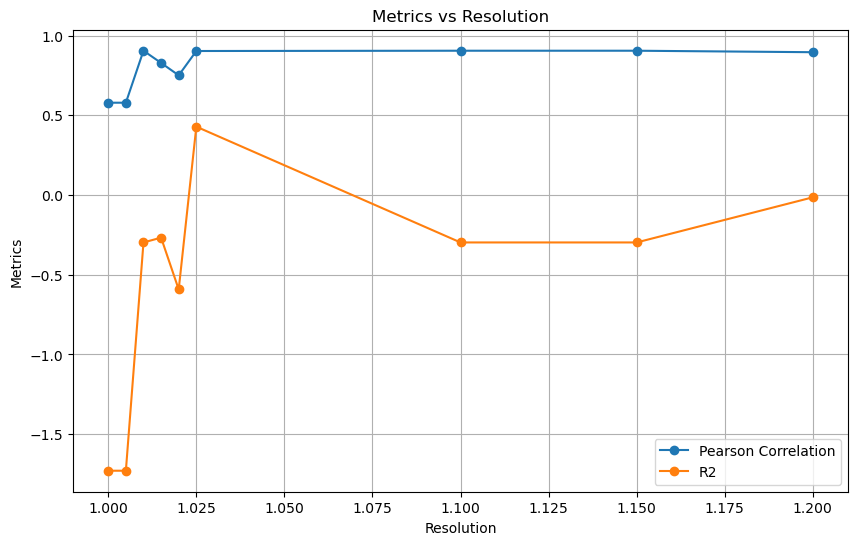

In [3]:
import matplotlib.pyplot as plt

# Plotting pearson_corr
plt.figure(figsize=(10, 6))
plt.plot(df['resolution'], df['pearson_corr'], marker='o', label='Pearson Correlation')
plt.plot(df['resolution'], df['r2'], marker='o', label='R2')
plt.xlabel('Resolution')
plt.ylabel('Metrics')
plt.title('Metrics vs Resolution')
plt.legend()
plt.grid(True)
plt.show()

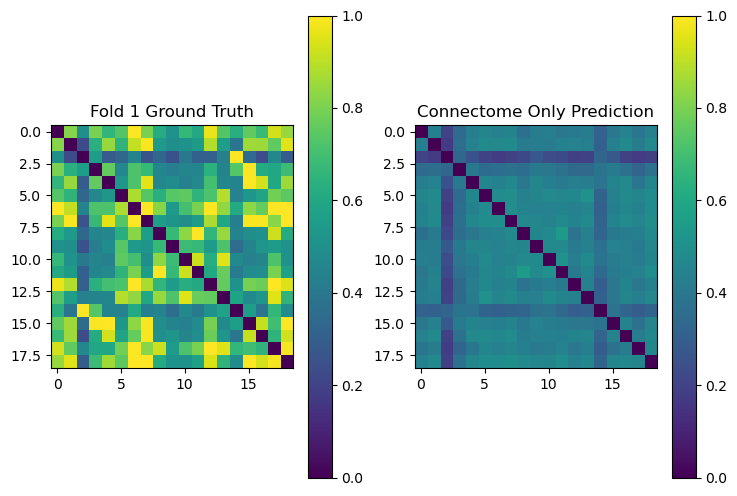

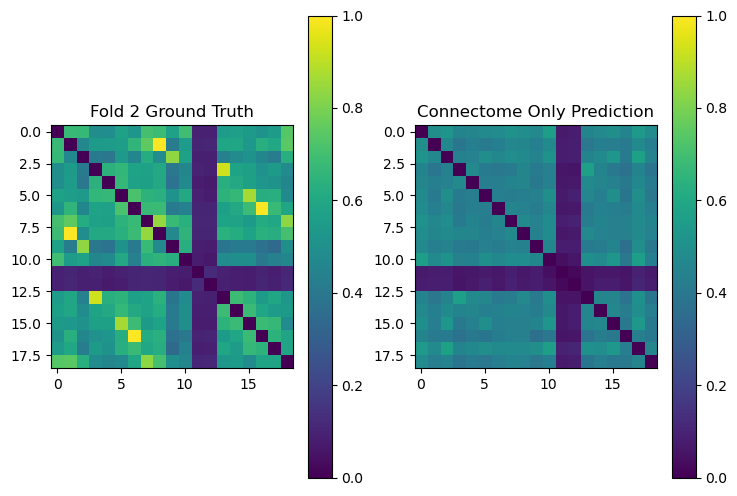

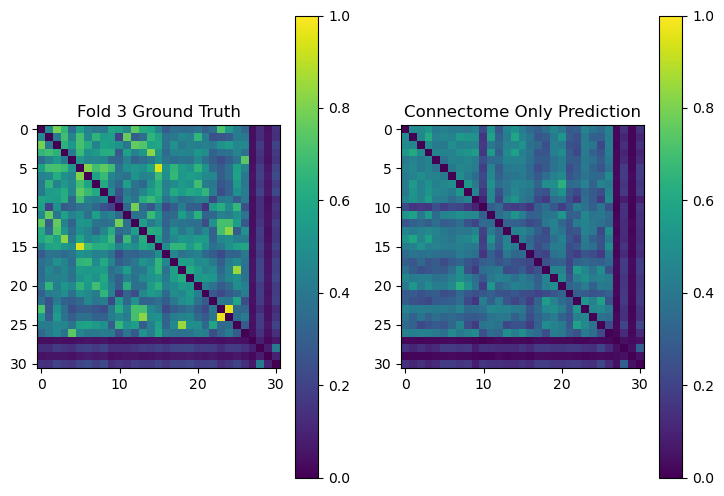

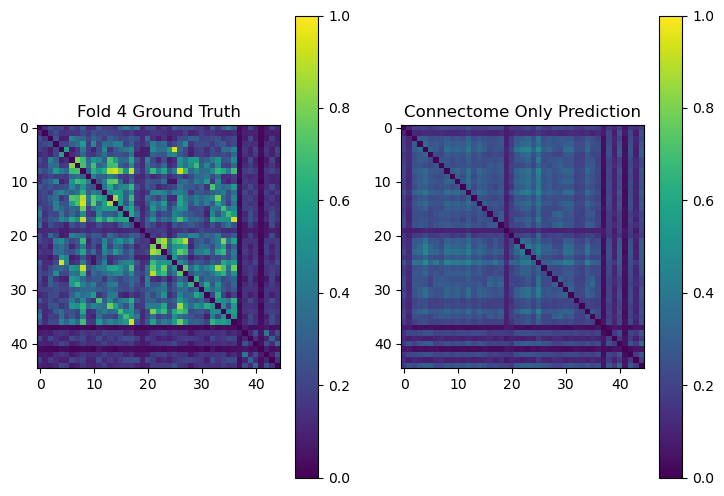

In [5]:
plot.plot_predictions(loaded_results[1.02])